# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [109]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [67]:
df.columns.tolist()

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

Histogram for AT


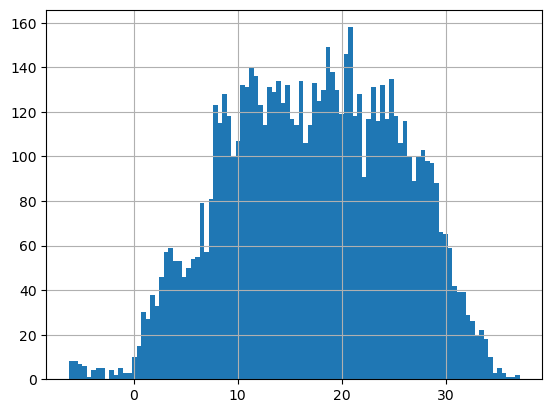

Histogram for AP


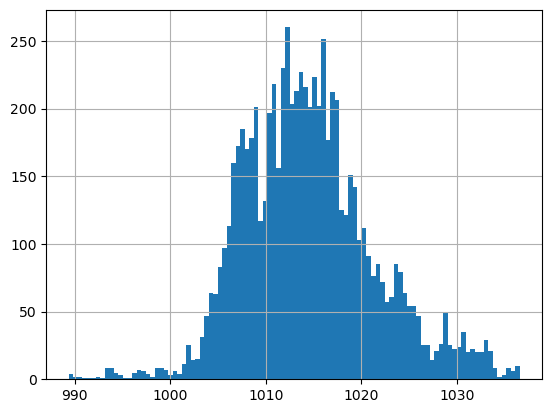

Histogram for AH


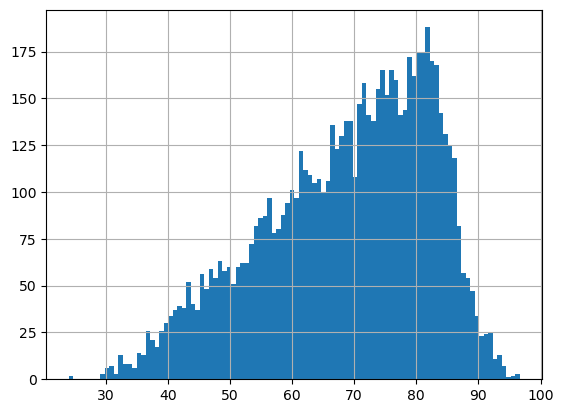

Histogram for AFDP


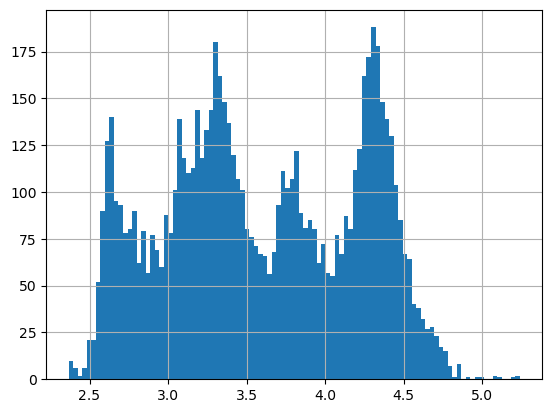

Histogram for GTEP


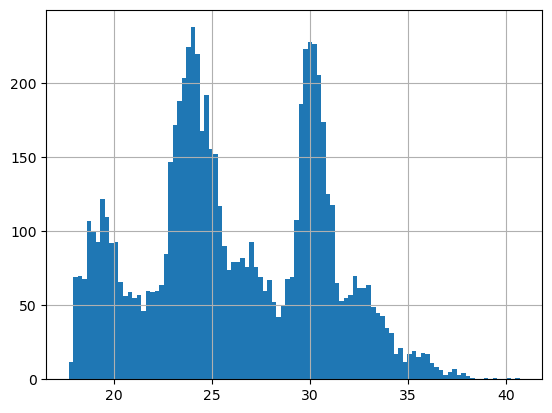

Histogram for TIT


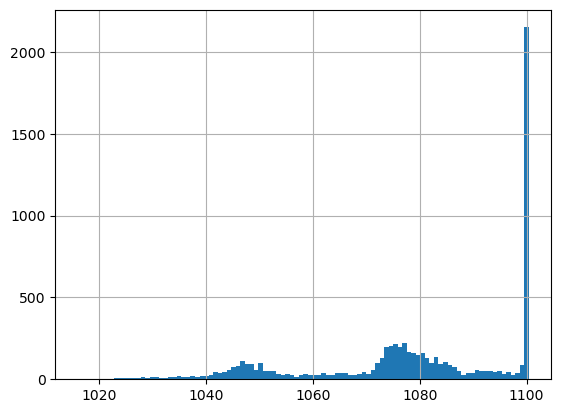

Histogram for TAT


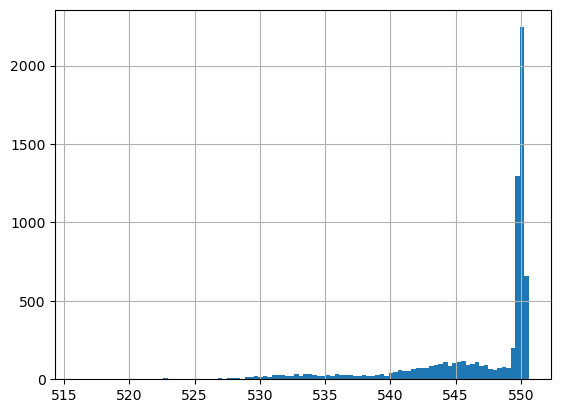

Histogram for TEY


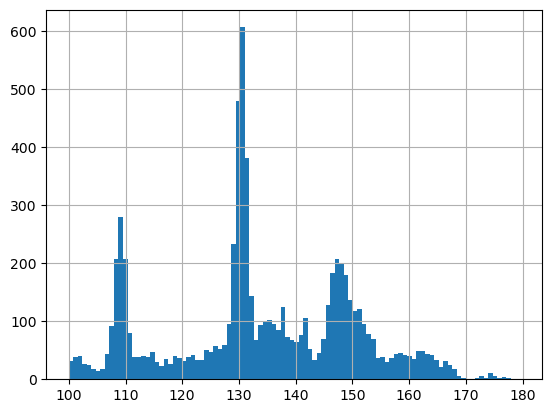

Histogram for CDP


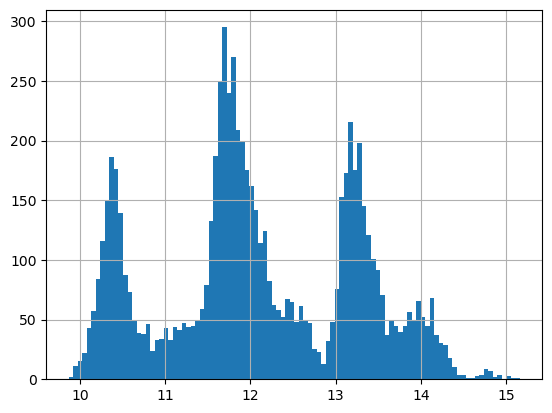

Histogram for CO


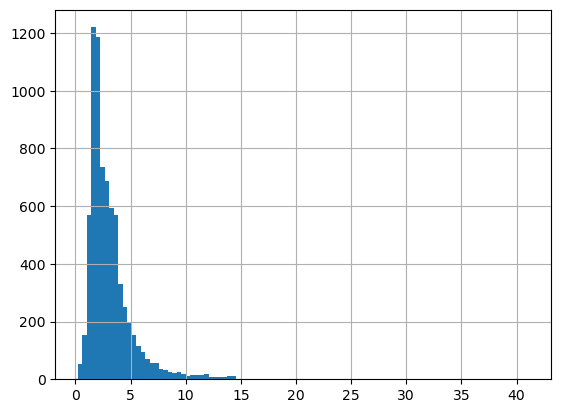

Histogram for NOX


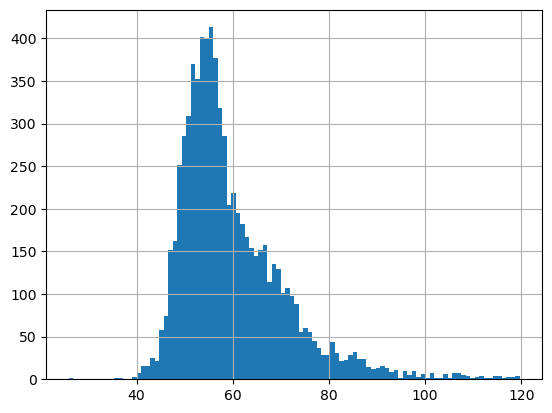

In [68]:
import matplotlib.pyplot as plt
cols = [ 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

for col in cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

<Axes: >

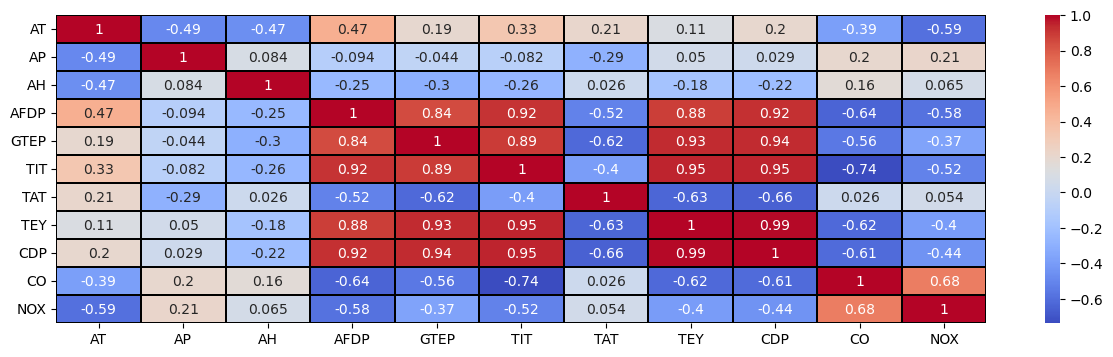

In [69]:
import seaborn as sns
plt.figure(figsize=(15, 4))

sns.heatmap(df[cols].corr(), annot = True,cmap= 'coolwarm', linewidths=0.1, linecolor='black')

In [70]:
def calculate_outliers(data): #функция для нахождения границ
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

for col in cols:
    boundaries = calculate_outliers(df[col])
    #Cчитаем и выводим количество выбросов в доходе.
    is_outlier = (df[col] < boundaries[0]) | (df[col] > boundaries[1])
    print('Kоличество выбросов в', col, ' = ', is_outlier.sum(), 
        'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])

Kоличество выбросов в AT  =  0 граница нижняя - -7.844000000000003 граница верхняя - 42.602000000000004
Kоличество выбросов в AP  =  206 граница нижняя - 996.7375000000002 граница верхняя - 1031.2374999999997
Kоличество выбросов в AH  =  2 граница нижняя - 29.13749999999999 граница верхняя - 109.96350000000001
Kоличество выбросов в AFDP  =  0 граница нижняя - 1.5010125000000007 граница верхняя - 5.811112499999999
Kоличество выбросов в GTEP  =  1 граница нижняя - 12.840124999999993 граница верхняя - 40.32512500000001
Kоличество выбросов в TIT  =  38 граница нижняя - 1026.3999999999999 граница верхняя - 1144.0000000000002
Kоличество выбросов в TAT  =  619 граница нижняя - 536.8237499999999 граница верхняя - 557.95375
Kоличество выбросов в TEY  =  1 граница нижняя - 94.8975 граница верхняя - 178.51749999999998
Kоличество выбросов в CDP  =  0 граница нижняя - 8.942375 граница верхняя - 15.671375
Kоличество выбросов в CO  =  444 граница нижняя - -1.0333874999999997 граница верхняя - 6.54411

In [71]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

####  Я бы выделил 3 типа станций по энергоэффективности, на основании графиков распределения TEY — энергоотдача турбины и CDP — давление нагнетания компрессора, GTEP — давление на выходе из газовой турбины. Соответственно эти 3 группы отличаются мощностью и энергоэффективностью, выбросами, а так же условиями работы и места. Присутствуют станции, которые работают как при отрицательных температурах, так и в жарком климате, как с высокой влажностью, так и с низкой. 
#### Некоторые признаки имеют сильную прямую линейную зависимость AFDP GTEP TIT TAY CDP, к-ты их  корреляции близки к 1.
#### Так же на графиках наблюдаются выбросы.


# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436


In [73]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(df_scaled)

DBSCAN()

In [74]:
from sklearn.metrics import silhouette_score
df_scaled['labels'] = model.labels_
silhouette_score(df_scaled, df_scaled['labels'])

0.33393003500688717

In [75]:
#Перебор параметров С и ядер в цикле, цель получить набольшие значения F1 метрик на обоих классах
import numpy as np
best_sil_score = 10000000
best_eps = -1
best_min_samp = -1
for e in np.arange(0.5, 1, 0.05):    
        
    for min_samp in np.arange(1, 25, 1): 
                        
        par_eps = e  
        par_min_samp = min_samp 
                                     
        model =DBSCAN(eps=e, min_samples=min_samp)
             
        model.fit(df_scaled)
        df_scaled['labels'] = model.labels_
                
        sil_score = silhouette_score(df_scaled, df_scaled['labels'])                                       
        
        if  sil_score < best_sil_score:
            best_sil_score =  sil_score 
            best_eps = par_eps
            best_min_samp = par_min_samp                        
    
print('\nЛучший гиперпараметр eps:', best_eps)
print('\nЛучший гиперпараметр min_samples:', best_min_samp)
print('Лучший показатель silhouette_score:', best_sil_score)



Лучший гиперпараметр eps: 0.5

Лучший гиперпараметр min_samples: 22
Лучший показатель silhouette_score: -0.017002291069903606


In [156]:
# Параметры, которые показали Лучший показатель silhouette_score не используем, ибо получаются одни выбросы
model = DBSCAN(eps=0.95, min_samples=30)
model.fit(df_scaled)
df_scaled['labels'] = model.labels_
sil_sc = silhouette_score(df_scaled, df_scaled['labels'])
sil_sc


0.028833943444342054

In [157]:
df_scaled['labels'].value_counts()

labels
 0     4499
-1     1323
 8      608
 10     213
 12     163
 9       93
 11      83
 15      64
 6       47
 1       42
 5       41
 14      37
 4       30
 3       30
 2       30
 13      30
 7       30
 16      21
Name: count, dtype: int64

### Кластер 0 - это станции, которые работают нормально, -1 выбросы, остальные работают с аномалиями

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

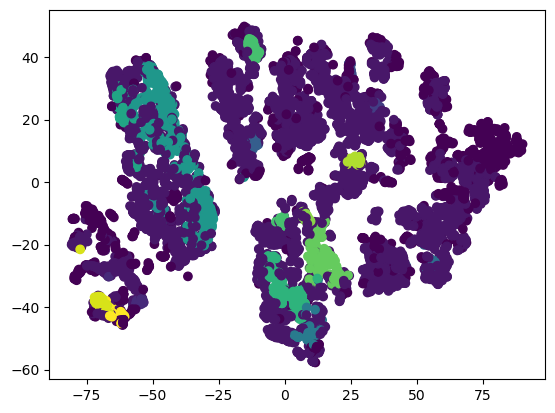

In [158]:
#здесь не удалось получить четкое разделение, перебором perplexity
from sklearn.manifold import TSNE
labels = model.labels_
tsne = TSNE(n_components=2, perplexity=50)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
plt.scatter(data[0], data[1], c=labels)
plt.show()

In [159]:
df['clusters'] = pd.DataFrame(data=model.labels_)

In [160]:
df_g = df.groupby('clusters').agg({x: ['mean', 'std'] for x in cols}).T
df_g

clusters           -1            0            1            2            3   \
AT   mean    12.737134    16.995249     3.997136     7.688013    16.348700   
     std      7.986712     7.347506     1.370152     0.874256     1.242499   
AP   mean  1016.930839  1014.151180  1023.502381  1009.923333   994.833667   
     std      9.448618     6.161396     1.436032     1.231955     2.480293   
AH   mean    66.454175    69.283304    80.826595    79.166167    57.906433   
     std     15.558822    13.018450     2.730195     2.771701     5.937001   
AFDP mean     3.350202     3.539565     4.126421     3.035107     3.304113   
     std      0.685920     0.562342     0.037824     0.067045     0.067510   
GTEP mean    25.603213    25.775998    33.606810    23.131600    28.472200   
     std      5.863228     4.207917     0.343772     0.272240     0.376576   
TIT  mean  1067.766742  1078.634385  1099.947619  1072.626667  1074.830000   
     std     25.432140    17.891637     0.091700     1.454822     1.151356   
TAT  mean   543.839675   547.607855   530.509048   549.948667   550.005667   
     std      7.459081     4.556172     1.147510     0.166583     0.189585   
TEY  mean   128.902116   133.135966   165.757619   130.213333   130.009000   
     std     21.605499    14.849729     1.415410     1.044950     0.981573   
CDP  mean    11.760872    12.014019    14.202167    11.559500    11.691433   
     std      1.451247     1.053387     0.076998     0.078616     0.054531   
CO   mean     5.070195     2.925755     2.680238     3.559810     3.488643   
     std      3.914324     1.404939     0.208509     0.262491     0.220111   
NOX  mean    69.307263    58.982002    58.350810    72.458533    63.877133   
     std     15.987002     9.167623     0.844660     1.215865     1.707308   

clusters            4            5            6            7            8   \
AT   mean    20.359600    18.935293    15.680830    22.305833    28.168826   
     std      1.026590     0.950755     0.993571     1.177296     3.377280   
AP   mean  1013.973333  1014.946341  1010.825532  1012.756667  1009.445395   
     std      1.523140     1.108399     2.018121     1.155402     2.717085   
AH   mean    72.717967    81.917927    85.205383    69.666633    63.925709   
     std      2.418642     2.677492     2.222925     2.928862    12.949589   
AFDP mean     3.609767     2.834056     3.318621     4.317593     4.372799   
     std      0.050718     0.075827     0.069084     0.053678     0.107071   
GTEP mean    26.081233    19.536585    23.786106    30.896933    29.835849   
     std      0.322136     0.327983     0.347919     0.274184     0.358898   
TIT  mean  1087.873333  1049.636585  1075.874468  1099.923333  1099.893421   
     std      1.461915     1.817520     1.912370     0.219220     0.330328   
TAT  mean   549.914333   550.038049   550.029787   541.733000   545.704836   
     std      0.269197     0.242871     0.243520     0.872227     1.316183   
TEY  mean   137.710333   109.840000   129.844468   151.127667   147.129556   
     std      1.237543     1.363195     1.416089     0.891596     1.263176   
CDP  mean    12.295467    10.473585    11.729617    13.417700    13.152299   
     std      0.099210     0.088705     0.092239     0.060606     0.090813   
CO   mean     1.725761     4.478817     2.105760     1.528180     1.649759   
     std      0.312700     0.358131     0.268171     0.237081     0.350361   
NOX  mean    54.733400    53.021244    50.392830    50.108700    54.489280   
     std      1.501849     2.334444     1.886928     1.760123     2.106870   

clusters            9            10           11           12           13  \
AT   mean    27.204355    21.609624    26.799880    14.672931    16.590267   
     std      1.835148     2.353346     1.635837     2.180146     0.978090   
AP   mean  1014.696774  1014.513615  1015.083133  1018.620859  1018.676667   
     std      1.447971     1.604784     1.771235     1.576856     1.321620   
AH   mean    50.2651

In [161]:
functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in cols]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

clusters            -1            0            1            2            3  \
AT   mean    12.737134    16.995249     3.997136     7.688013    16.348700   
     std      7.986712     7.347506     1.370152     0.874256     1.242499   
AP   mean  1016.930839  1014.151180  1023.502381  1009.923333   994.833667   
     std      9.448618     6.161396     1.436032     1.231955     2.480293   
AH   mean    66.454175    69.283304    80.826595    79.166167    57.906433   
     std     15.558822    13.018450     2.730195     2.771701     5.937001   
AFDP mean     3.350202     3.539565     4.126421     3.035107     3.304113   
     std      0.685920     0.562342     0.037824     0.067045     0.067510   
GTEP mean    25.603213    25.775998    33.606810    23.131600    28.472200   
     std      5.863228     4.207917     0.343772     0.272240     0.376576   
TIT  mean  1067.766742  1078.634385  1099.947619  1072.626667  1074.830000   
     std     25.432140    17.891637     0.091700     1.454822     1.151356   
TAT  mean   543.839675   547.607855   530.509048   549.948667   550.005667   
     std      7.459081     4.556172     1.147510     0.166583     0.189585   
TEY  mean   128.902116   133.135966   165.757619   130.213333   130.009000   
     std     21.605499    14.849729     1.415410     1.044950     0.981573   
CDP  mean    11.760872    12.014019    14.202167    11.559500    11.691433   
     std      1.451247     1.053387     0.076998     0.078616     0.054531   
CO   mean     5.070195     2.925755     2.680238     3.559810     3.488643   
     std      3.914324     1.404939     0.208509     0.262491     0.220111   
NOX  mean    69.307263    58.982002    58.350810    72.458533    63.877133   
     std     15.987002     9.167623     0.844660     1.215865     1.707308   

clusters             4            5            6            7            8  \
AT   mean    20.359600    18.935293    15.680830    22.305833    28.168826   
     std      1.026590     0.950755     0.993571     1.177296     3.377280   
AP   mean  1013.973333  1014.946341  1010.825532  1012.756667  1009.445395   
     std      1.523140     1.108399     2.018121     1.155402     2.717085   
AH   mean    72.717967    81.917927    85.205383    69.666633    63.925709   
     std      2.418642     2.677492     2.222925     2.928862    12.949589   
AFDP mean     3.609767     2.834056     3.318621     4.317593     4.372799   
     std      0.050718     0.075827     0.069084     0.053678     0.107071   
GTEP mean    26.081233    19.536585    23.786106    30.896933    29.835849   
     std      0.322136     0.327983     0.347919     0.274184     0.358898   
TIT  mean  1087.873333  1049.636585  1075.874468  1099.923333  1099.893421   
     std      1.461915     1.817520     1.912370     0.219220     0.330328   
TAT  mean   549.914333   550.038049   550.029787   541.733000   545.704836   
     std      0.269197     0.242871     0.243520     0.872227     1.316183   
TEY  mean   137.710333   109.840000   129.844468   151.127667   147.129556   
     std      1.237543     1.363195     1.416089     0.891596     1.263176   
CDP  mean    12.295467    10.473585    11.729617    13.417700    13.152299   
     std      0.099210     0.088705     0.092239     0.060606     0.090813   
CO   mean     1.725761     4.478817     2.105760     1.528180     1.649759   
     std      0.312700     0.358131     0.268171     0.237081     0.350361   
NOX  mean    54.733400    53.021244    50.392830    50.108700    54.489280   
     std      1.501849     2.334444     1.886928     1.760123     2.106870   

clusters             9           10           11           12           13  \
AT   mean    27.204355    21.609624    26.799880    14.672931    16.590267   
     std      1.835148     2.353346     1.635837     2.180146     0.978090   
AP   mean  1014.696774  1014.513615  1015.083133  1018.620859  1018.676667   
     std      1.447971     1.604784     1.771235     1.576856     1.321620   
AH   mean    50.2651

In [162]:
df_g_rel.columns.tolist()

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'Global']

In [163]:
cluster_labels = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

clusters          -1          0          1          2          3          4  \
AT   mean -26.055488  -1.335307 -76.794917 -55.367793  -5.088802  18.196189   
     std   -1.347265  -9.242800 -83.075730 -89.201100 -84.652515 -87.319445   
AP   mean   0.238709  -0.035281   0.886465  -0.452019  -1.939405  -0.052811   
     std   37.027242 -10.645229 -79.174142 -82.133750 -64.029907 -77.910884   
AH   mean  -3.195004   0.926239  17.741560  15.322784 -15.646653   5.929575   
     std   14.900584  -3.859846 -79.837743 -79.531222 -56.155746 -82.138535   
AFDP mean  -6.910627  -1.648948  14.657563 -15.665925  -8.191252   0.301692   
     std   12.404270  -7.846837 -93.801582 -89.013045 -88.936869 -91.688726   
GTEP mean  -2.016581  -1.355335  28.613158 -11.475437   8.963023  -0.187199   
     std   31.058854  -5.941782 -92.315777 -93.914713 -91.582526 -92.799403   
TIT  mean  -1.038759  -0.031539   1.943783  -0.588338  -0.384132   0.824732   
     std   28.689213  -9.466498 -99.535990 -92.638455 -94.174022 -92.602562   
TAT  mean  -0.512732   0.176600  -2.951369   0.604816   0.615244   0.598536   
     std   35.889806 -16.995499 -79.094620 -96.965186 -96.546126 -95.095768   
TEY  mean  -3.799638  -0.639893  23.705827  -2.821070  -2.973565   2.773983   
     std   33.538667  -8.217212 -91.251676 -93.541405 -93.933122 -92.351026   
CDP  mean  -2.778805  -0.686167  17.402146  -4.443446  -3.352820   1.640419   
     std   27.683096  -7.321238 -93.225568 -93.083201 -95.202269 -91.271349   
CO   mean  61.987825  -6.524977 -14.368994  13.732474  11.458768 -44.863600   
     std   75.140479 -37.138155 -90.670578 -88.255250 -90.151462 -86.008733   
NOX  mean  15.723282  -1.516947  -2.570858  20.985001   6.656520  -8.610896   
     std   43.607041 -17.649646 -92.412639 -89.078201 -84.663705 -86.509287   

clusters           5          6          7          8          9         10  \
AT   mean   9.927475  -8.966074  29.494906  63.532085  57.932919  25.453115   
     std  -88.256175 -87.727306 -85.457905 -58.283465 -77.332054 -70.931215   
AP   mean   0.043098  -0.363090  -0.172738  -0.499130   0.018498   0.000444   
     std  -83.925597 -70.732486 -83.243944 -60.595865 -79.001006 -76.726843   
AH   mean  19.331323  24.120219   1.484642  -6.878266 -26.777817  13.285201   
     std  -80.226948 -83.583886 -78.370599  -4.368383 -56.920787 -59.434144   
AFDP mean -21.252356  -7.788132  19.969504  21.503464  20.233867   5.654696   
     std  -87.574021 -88.678978 -91.203555 -82.453803 -91.347342 -86.552762   
GTEP mean -25.233547  -8.970643  18.242470  14.181703  16.789907  -6.010464   
     std  -92.668696 -92.223083 -93.871244 -91.977676 -93.093693 -91.121041   
TIT  mean  -2.719072  -0.287330   1.941533   1.938760   1.945748   0.077709   
     std  -90.803165 -90.323212 -98.890724 -98.328508 -99.446807 -90.574823   
TAT  mean   0.621167   0.619656  -0.898116  -0.171529  -0.659905   0.608504   
     std  -95.575376 -95.563539 -84.109734 -76.021732 -80.243598 -95.018101   
TEY  mean -18.025801  -3.096356  12.787413   9.803600  11.851056  -2.512036   
     std  -91.574404 -91.247477 -94.489251 -92.192597 -93.341210 -93.093919   
CDP  mean -13.420154  -3.037174  10.917356   8.723423  10.213539  -1.531602   
     std  -92.195551 -91.884623 -94.667764 -92.010149 -93.628946 -92.214657   
CO   mean  43.093858 -32.723025 -51.176132 -47.291790 -51.937045 -37.095013   
     std  -83.975970 -88.001110 -89.392189 -84.323633 -85.322683 -87.292135   
NOX  mean -11.469706 -15.858405 -16.332821  -9.018507 -18.111929 -11.518104   
     std  -79.030300 -83.050223 -84.189277 -81.074535 -82.106755 -80.062587   

clusters          11         12         13         14         15         16  \
AT   mean  55.584767 -14.817360  -3.686404 -69.975394 -53.392347 -67.457508   
     std  -79.793963 -73.070602 -87.918521 -83.168429 -85.562218 -72.711328   
AP   mean   0.056581   0.405294   0.410795   0.980804   0.959234   0.970719   
     std  -74.312917 -77.131865 -80.833400 -84.9

<Axes: xlabel='clusters', ylabel='None-None'>

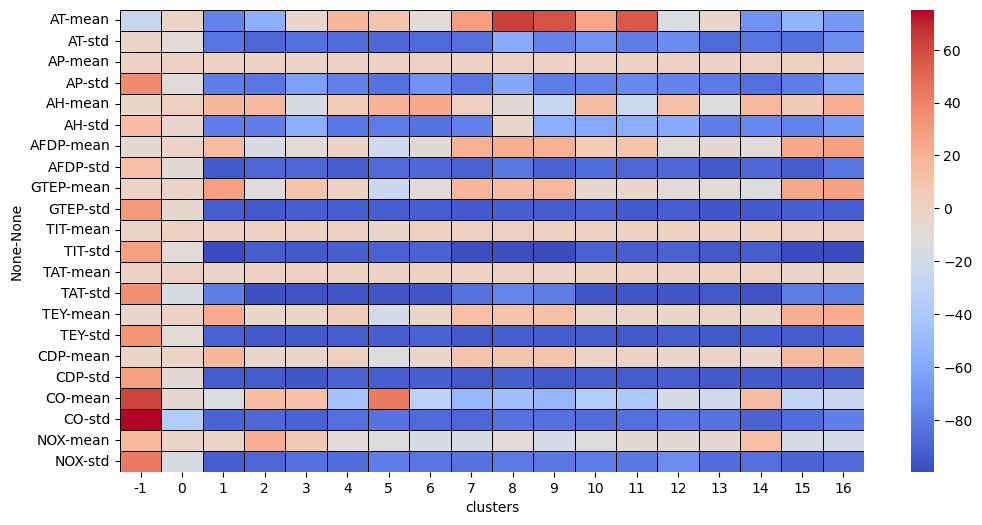

In [164]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm', linewidths=0.5, linecolor='black')

## Вывод
### Как видно из грайика, то станции работающие нормально имеют средние показатели по выборке. Большинство  аномально-работающих станции находятся в других климатических условиях(температура, давление, влажность) и у них отличаются выбросы угарного газа, от нормально работающих. Остальные параметры практически похожи.